In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('bank_marketing_part1_Data.csv')

In [3]:
df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


In [5]:
df.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


In [6]:
isna = df.isnull().sum().sum()
print("{} Missing values is not present".format(isna)) if isna == 0  else print("{} Missing values is present".format(isna))

0 Missing values is not present


## checking for Outliers

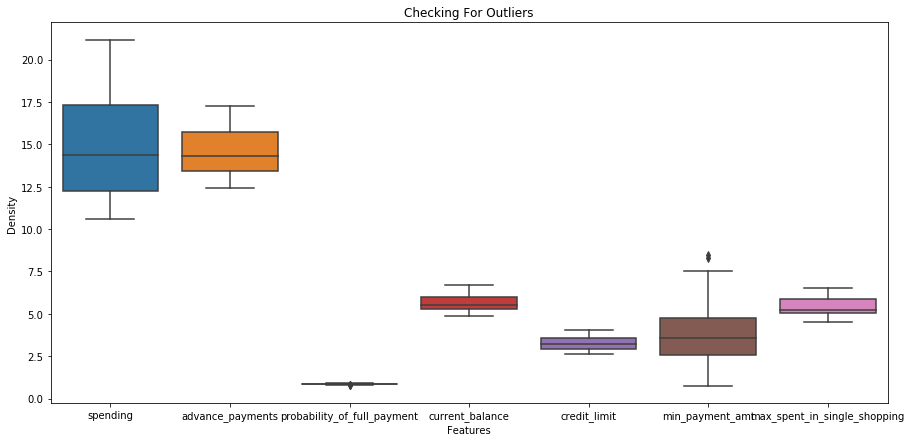

In [7]:
plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('Checking For Outliers');
plt.xlabel('Features');
plt.ylabel('Density');

## Only min_payment_amt has outliers and will remove this.

In [8]:
def inter_quartile_range(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)
    IQR = Q3 - Q1
    ul = Q3 + 1.5*IQR
    ll = Q1 - 1.5*IQR
    return ll, ul

In [9]:
columns = [i for i in df.columns]
for i in columns:
    ll, ul = inter_quartile_range(df[i])
    df[i] = np.where(df[i] < ll, ll, df[i])
    df[i] = np.where(df[i] > ul, ul, df[i])    

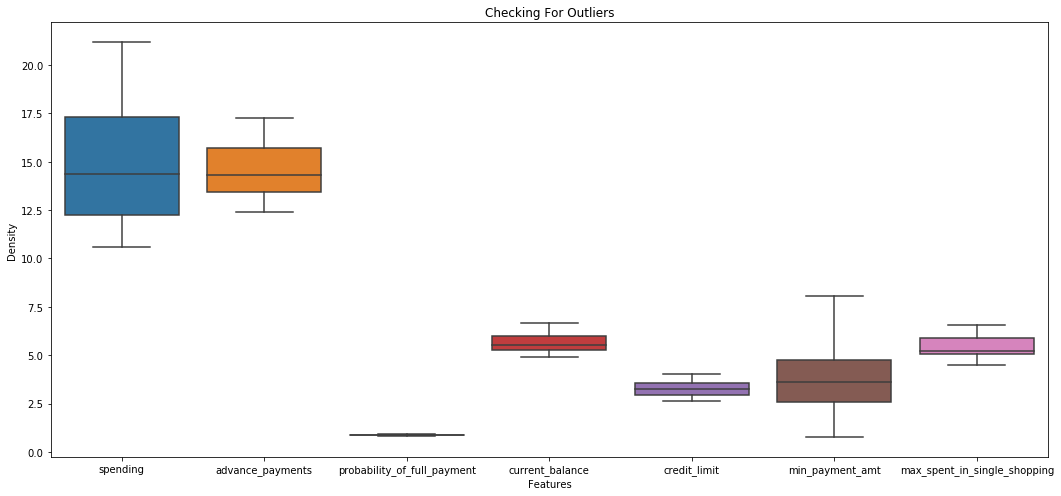

In [10]:
plt.figure(figsize=(15,7));
sns.boxplot(data=df);
plt.title('Checking For Outliers');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

## Scaling the dataset

In [11]:
scalar = StandardScaler()
scaled_data = scalar.fit_transform(df)
scaled_data = pd.DataFrame(scaled_data, columns=list(df))

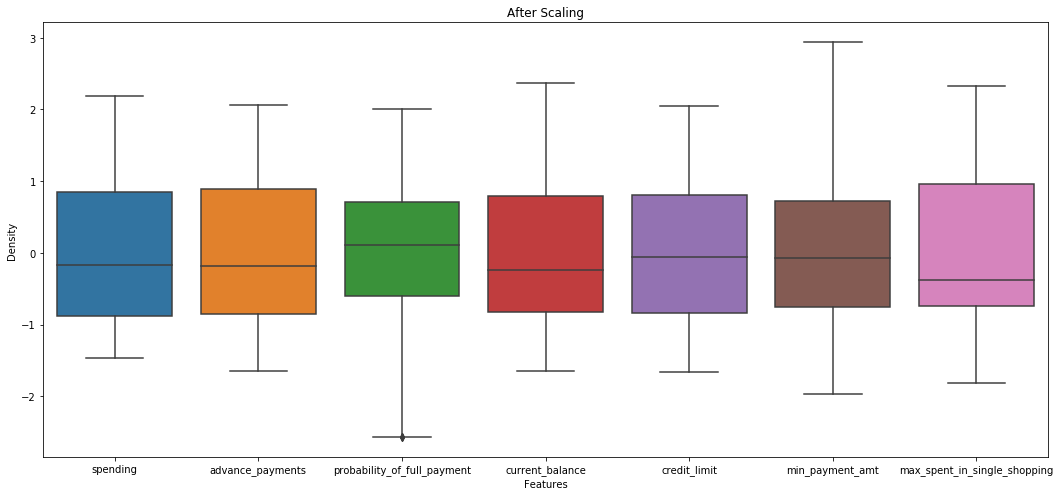

In [12]:
plt.figure(figsize=(15,7));
sns.boxplot(data=scaled_data);
plt.title('After Scaling');
plt.xlabel('Features');
plt.ylabel('Density');
plt.tight_layout();

## Hence, our features got scaled and looks perfectly on the same scale.

In [13]:
## checking duplicate data
is_dup = df.duplicated().sum()
print('No Duplicate record present in dataset') if is_dup == 0 else print('duplicate record is present')

No Duplicate record present in dataset


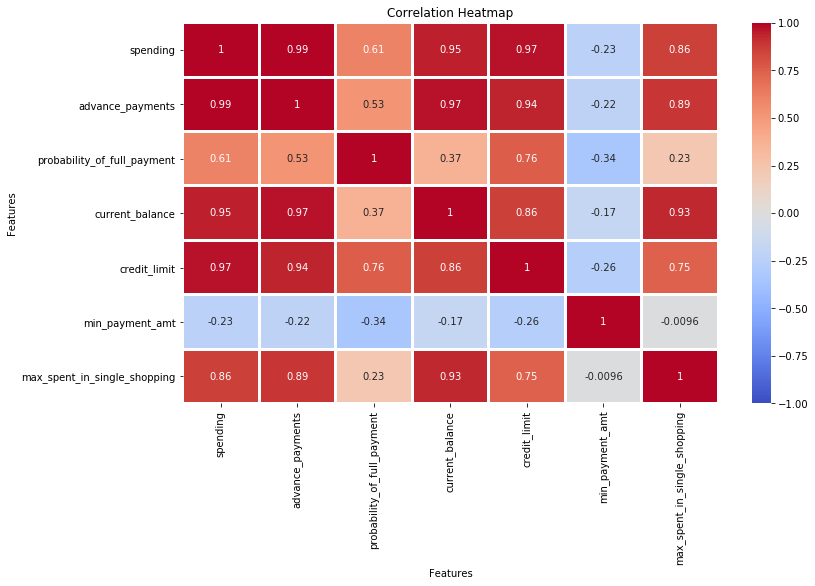

In [14]:
plt.figure(figsize=(12,7));
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', lw=2, annot=True);
plt.title('Correlation Heatmap');
plt.xlabel('Features');
plt.ylabel('Features');

### Therefore, we can say that multicollineraity is present in the dataset.
### Spending and advance_payment shows high corelation whereas current balance and min_payment_amt shows low correlation in negative direction.

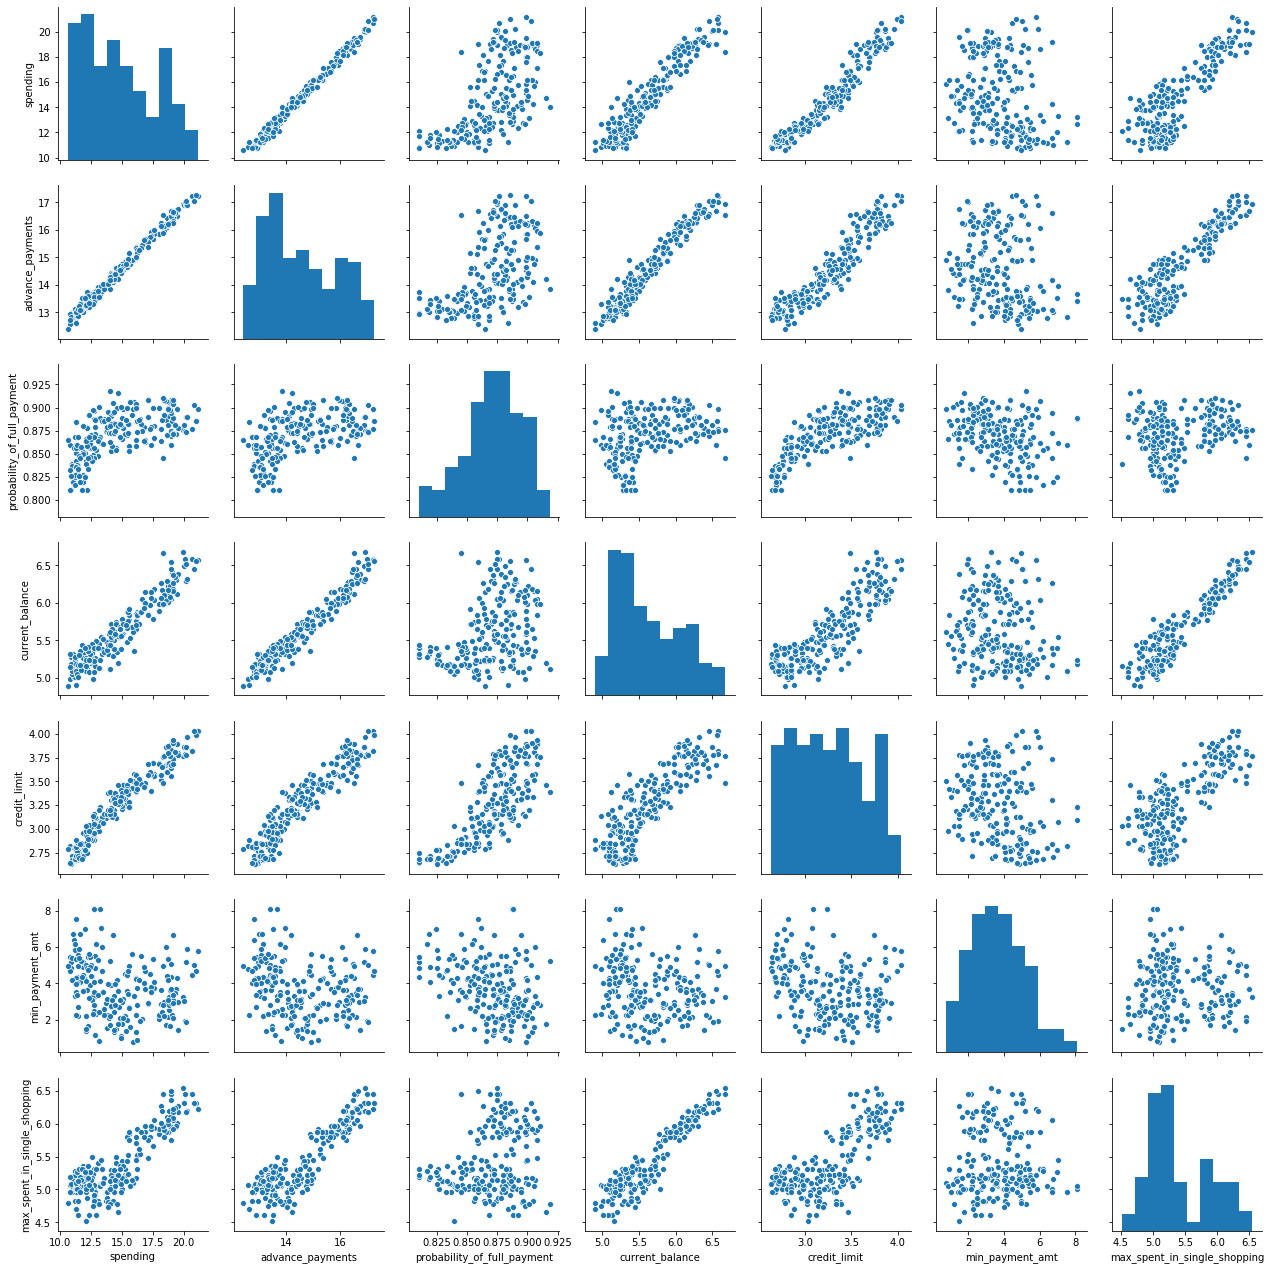

In [15]:
sns.pairplot(df);

### We can clearly see a good pattern between spending and advance payment.
### min_payment_amt is looking normally distributed.

# Agglomerative Clustering

In [16]:
from scipy.cluster.hierarchy import dendrogram, fcluster, linkage

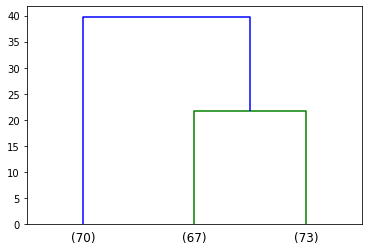

In [17]:
ward_linkage = linkage(scaled_data, method='ward', metric='euclidean')
dend = dendrogram(ward_linkage, p=3, truncate_mode='lastp', labels=list(scaled_data))

In [18]:
clusters = fcluster(ward_linkage, 3, criterion='maxclust')

In [19]:
agglomerative_df = df
agglomerative_df['cluster'] = clusters
agglomerative_df.to_csv('bank_marketing_using_agglomerative_clustering.csv', index=False)

In [20]:
agglomerative_df.head(5)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


## Clusters Profiling 

In [21]:
agglomerative_df.groupby('cluster').mean().T

cluster,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178


# KMeans Clustering 

In [22]:
from sklearn.cluster import KMeans

In [23]:
wss = []
for i in range(1, 15):
    model = KMeans(n_clusters=i,random_state=40)
    model.fit(scaled_data)
    wss.append(model.inertia_)

In [24]:
wss

[1469.9999999999998,
 659.1474009548498,
 430.298481751223,
 370.7478207918677,
 329.94022026722894,
 295.14672526974044,
 262.10272966848305,
 241.5821996951504,
 222.57750927004864,
 204.47875505553512,
 191.03794619880995,
 182.61001426128757,
 172.00790694387862,
 164.60003115124886]

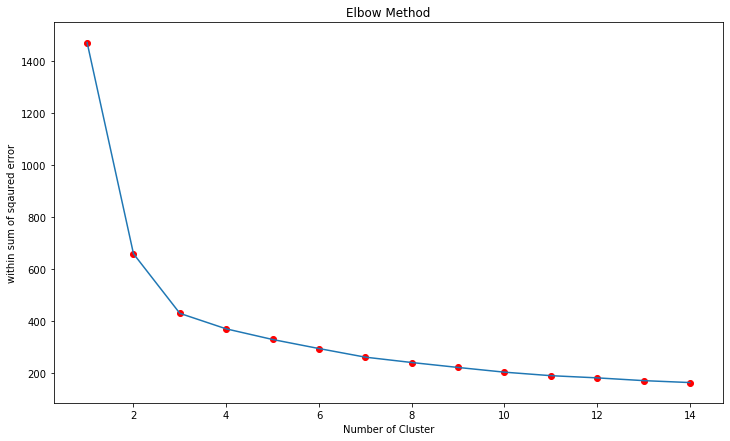

In [25]:
plt.figure(figsize=(12,7));
i = [i for i in range(1, 15)]
plt.plot(i, wss);
plt.scatter(i, wss, c='r');
plt.title('Elbow Method');
plt.xlabel('Number of Cluster');
plt.ylabel('within sum of sqaured error');

In [26]:
## cheking silhouette score and samples 
from sklearn.metrics import silhouette_samples, silhouette_score

In [27]:
sil_score = []
for i in range(1, 15):
    model = KMeans(n_clusters=i,random_state=40)
    model.fit(scaled_data)
    sil_score.append(silhouette_score(scaled_data, model.labels_)) if i != 1 else 0

In [28]:
sil_score

[0.46560100442748986,
 0.4008059221522216,
 0.33482727490284064,
 0.28145970145405913,
 0.2774589548285115,
 0.2755300246869991,
 0.2646374346761894,
 0.27237405330629844,
 0.2598206481375414,
 0.2507712479816504,
 0.24242373568124162,
 0.24564932820188465,
 0.23976212457370133]

### Hence, we will choose n_clusters = 2 for optimum solution.

In [29]:
model = KMeans(n_clusters=2,random_state=40)
model.fit(scaled_data)
print(silhouette_score(scaled_data, model.labels_))

0.46560100442748986


In [30]:
clusters = model.labels_

In [31]:
kmeans_df = df
kmeans_df['cluster'] = clusters
kmeans_df.to_csv('bank_marketing_with_kmeans_clustering.csv', index=False)

In [32]:
kmeans_df.groupby('cluster').mean().T

cluster,0,1
spending,12.930602,18.158571
advance_payments,13.693459,16.054805
probability_of_full_payment,0.863619,0.883817
current_balance,5.339699,6.127429
credit_limit,3.025917,3.660519
min_payment_amt,3.822845,3.480417
max_spent_in_single_shopping,5.081737,5.971740
